# Project: Data analysis on the dataset: No-Show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report deals with the dataset 'No-show appointments'. This dataset contains around 100k medical appointments in Brazil. It focuses on the question whether or not a patient shows up for his appointment. 
I will try to analyse the questions if the gender, age or membership of the Brazilian welfare program Bolsa Familia has an influence of the attendance of an appointment and if this 'Show Up' rate can be increased by receiving a SMS. 
At the end I analyse the influence of a receiving SMS depending on the fact that a patient has a scholarship for the welfare program or not. 

The report is structured the following:
Following this introduction, there will be a section which deals with the data wrangling which means importing the relevant packages and checking the dataset as well as cleaning up the data for further analysis. 
Afterwards there will be the data analysis section which is the main part of the work and tries to answer the already mentioned questions. 
Then there will be a conclusion which summarizes all the results and at the end there will be the reference section which collects the used references. 


<a id='wrangling'></a>
## Data Wrangling
The chapter Data Wrangling is divided into the section General Properties which loads the packages and give a first check on the data and the section Data Cleaning which will clean and prepare the dataset for further analysis. 


### General Properties
In the first part all packages will be imported, the data are imported and a first data overview will be performed. 
This section is separated in six steps:
1. Step: Import packages for Data Analysis
2. Step: Load data
3. Step: Check data structure and column naming
4. Step: Check types of variables / columns and missing data
5. Step: Check for duplicates
6. Step: Get a first statistical overview of the data and check for data integrity

#### 1. Step: Import packages for Data Analysis

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#### 2. Step: Load data

In [2]:
# load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### 3. Step: Check data structure and column naming

In [3]:
# check structure of the data by showing first 5 entries
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Results
- rename columns for better readability and to correct misspellings (e.g. Handcap -> handicap) 
- use underlines for consistency and to work easier with the data
- separate time from ScheduledDay make it easier to work with the data
- separate time from AppointmentDay make it easier to work with the data (or remove it when it is midnight for all data, as indicated by the first 10 entries) -> will be checked during the Data Cleaning section

#### 4. Step: Check types of variables / columns and missing data

In [4]:
# check variable types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Results
- all columns are complete (all columns have 110527 entries)
- no null values
- PatientId is float and should be changed to int for consistency and to work better with the data (ID is normally an INT)

#### 5. Step: Check for duplicates

In [5]:
# check dublicates
print(sum(df.duplicated()))

0


##### Results
- No duplicates found

#### 6. Step: Get a first statistical overview of the data and check for data integrity

In [6]:
# get a first statistical overview of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# check how many datasets have ages < 0 years
print(df[df.Age < 0].shape[0])

1


##### Results
- There is one dataset with an age of -1. This dataset should be deleted, because I do not know what causes this entry (unborn kid with an appointment / typo?) and I still have more than 100k entries. 

### Data Cleaning
Within this section the data will be cleaned. So all previous mentioned findings and problems will be solved in this section: 
1. Step: Rename columns for better readability and to correct misspellings
2. Step: Split date and time of schedule_day and and add day of the week
3. Step: Split date and time of appointment_day and and add day of the week
4. Step: Change type of patientID to int
5. Step: Remove entry with age<0
6. Step: Convert column no_show into type int for better data evaluation
7. Step: Create Masks for patients who showed up (df_Show) and patients who did not showed up (df_noShow)


#### 1. Step: Rename columns for better readability and to correct misspellings

In [8]:
# create variable with new column labels
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_date', 'appointment_date', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
# change column labels
df.columns = new_labels
# check changes
df.head(1)

,patientID,appointmentID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### 2. Step: Split day and time of schedule_date and and add day of the week

In [9]:
# convert type of schedule_date to datetime for an easier data process
df.schedule_date = pd.to_datetime(df.schedule_date)
# check type change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID           110527 non-null float64
appointmentID       110527 non-null int64
gender              110527 non-null object
schedule_date       110527 non-null datetime64[ns]
appointment_date    110527 non-null object
age                 110527 non-null int64
neighborhood        110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


In [10]:
# create new column schedule_day for the time of schedule_date
df['schedule_day'] = df['schedule_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [11]:
# create new column schedule_time for the time of schedule_date
# hours, minutes and seconds (H-M-S)
df['schedule_time'] = df['schedule_date'].apply(lambda x: x.strftime('%H-%M-%S'))

In [12]:
# create new column schedule_dow for the day of the week of schedule_date
#  1 (Monday) to 7 (Sunday)
df['schedule_dow'] = df['schedule_date'].apply(lambda x: x.strftime('%u'))

# check changes
df.head(1)

,patientID,appointmentID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,schedule_time,schedule_dow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18-38-08,5


#### 3. Step: Split date and time of appointment_day and and add day of the week

In [13]:
# convert type of appointment_date to datetime for an easier data process
df.appointment_date = pd.to_datetime(df.appointment_date)
# check type change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
patientID           110527 non-null float64
appointmentID       110527 non-null int64
gender              110527 non-null object
schedule_date       110527 non-null datetime64[ns]
appointment_date    110527 non-null datetime64[ns]
age                 110527 non-null int64
neighborhood        110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
schedule_day        110527 non-null object
schedule_time       110527 non-null object
schedule_dow        110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(6)
memory usage: 14.3+ MB


In [14]:
# create new column appointment_day for the time of appointment_date
df['appointment_day'] = df['appointment_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [15]:
# create new column appointment_time for the time of appointment_date
# hours, minutes and seconds (H-M-S)
df['appointment_time'] = df['appointment_date'].apply(lambda x: x.strftime('%H-%M-%S'))

In [16]:
# create new column appointment_dow for the day of the week of appointment_date
#  1 (Monday) to 7 (Sunday)
df['appointment_dow'] = df['appointment_date'].apply(lambda x: x.strftime('%u'))

# check changes
df.head(1)

,patientID,appointmentID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,schedule_time,schedule_dow,appointment_day,appointment_time,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18-38-08,5,2016-04-29,00-00-00,5


In [17]:
# check if any value of appointment_time is valid (NOT 00:00:00), otherwise remove column again
sum(df['appointment_time'] != '00-00-00')

0

In [18]:
# all values of appointment_time are '00-00-00', therefore column is not useful and will be droped again
df.drop('appointment_time', axis=1, inplace=True)
# check changes
df.head(1)

,patientID,appointmentID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,schedule_time,schedule_dow,appointment_day,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18-38-08,5,2016-04-29,5


#### 4. Step: Change type of patientID to int

In [19]:
# change type of patientID to int
df.patientID = df.patientID.astype(int);
# check patientID type change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
patientID           110527 non-null int64
appointmentID       110527 non-null int64
gender              110527 non-null object
schedule_date       110527 non-null datetime64[ns]
appointment_date    110527 non-null datetime64[ns]
age                 110527 non-null int64
neighborhood        110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
schedule_day        110527 non-null object
schedule_time       110527 non-null object
schedule_dow        110527 non-null object
appointment_day     110527 non-null object
appointment_dow     110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(8)
memory usage: 16.0

#### 5. Step: Remove entry with age<0

In [20]:
# get index of the row with an age < 0
df[df.age<0]

,patientID,appointmentID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,schedule_time,schedule_dow,appointment_day,appointment_dow
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,2016-06-06,08-58-13,1,2016-06-06,1


In [21]:
# remove entry with index 99832 ( see output above for the index age < 0)
df.drop([99832], axis=0, inplace=True)
# check if entry has been removed
print(df[df.age < 0].shape[0])

0


#### 6. Step: Convert column no_show into type int for better data evaluation

In [22]:
# change data type of column no_show to int for better plotting possibilities
# no_show = 0: patient showed up/ no_show = 1: patient did NOT show up
df['no_show'] = df['no_show'].apply(lambda x: 1 if x == 'Yes' else 0)
# check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 19 columns):
patientID           110526 non-null int64
appointmentID       110526 non-null int64
gender              110526 non-null object
schedule_date       110526 non-null datetime64[ns]
appointment_date    110526 non-null datetime64[ns]
age                 110526 non-null int64
neighborhood        110526 non-null object
scholarship         110526 non-null int64
hypertension        110526 non-null int64
diabetes            110526 non-null int64
alcoholism          110526 non-null int64
handicap            110526 non-null int64
sms_received        110526 non-null int64
no_show             110526 non-null int64
schedule_day        110526 non-null object
schedule_time       110526 non-null object
schedule_dow        110526 non-null object
appointment_day     110526 non-null object
appointment_dow     110526 non-null object
dtypes: datetime64[ns](2), int64(10), object(7)
memory usage: 16.9

#### 7. Step: Create Masks for patients who showed up (df_Show) and patients who did not showed up (df_noShow)

In [23]:
# seperate DataFrame into arrays with patients showed up and patients did not showed up 

# create data frame containing just person who showed up
df_Show = df[df.no_show == 0]

# create data frame containing just person who did NOT show up
df_noShow = df[df.no_show == 1]

# check if data frame df_noShow really consists of entries with no-show=Yes
df_Show.head(5)

,patientID,appointmentID,gender,schedule_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_day,schedule_time,schedule_dow,appointment_day,appointment_dow
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18-38-08,5,2016-04-29,5
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16-08-27,5,2016-04-29,5
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16-19-04,5,2016-04-29,5
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17-29-31,5,2016-04-29,5
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16-07-23,5,2016-04-29,5


<a id='eda'></a>
## Data Analysis

The following questions will be discussed in this section:
- Research Question 1: Percentage of people showing up vs. not showing up
- Research Question 2: Gender
- Research Question 3: Influence of the age onto the attendance of an appointment
- Research Question 4: Influence of a scholarship onto the attendance of an appointment
- Research Question 5: Useful to receive a SMS
- Research Question 6: Influence of receiving a SMS if a patient is member of a scholarship
- Research Question 7: Influence of receiving a SMS if a patient has NO scholarship
- Research Question 8: How does the day of the week relates to a No-Show Appointment?

### Research Question 1: Percentage of people showing up vs. not showing up
The first question deals with the question what is the percentage of the persons which show up compared with the persons which did not showed up. This section tries to understand how "big" the problem is that patient did not show up to an appointment. 

In [24]:
# calculate ratio of persons who showed up and who did not showed up
prop_Show = df_Show.shape[0] / df.shape[0]
prop_noShow = 1 - prop_Show

# create new dataframe containing the "show up" status, the total number of persons and the ratio of these persons
df_perc_show = pd.DataFrame([['showed up',df_Show.shape[0],prop_Show],['Not showed up',df_noShow.shape[0],prop_noShow]], columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_show)


          status  nof_patients     ratio
0      showed up         88207  0.798066
1  Not showed up         22319  0.201934


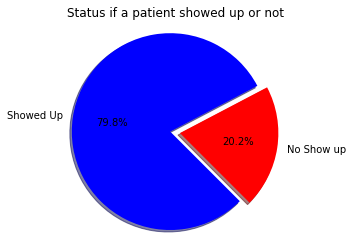

In [25]:
# Create Pie Plot
# Plot settings
labels = ['No Show up', 'Showed Up']
sizes = [prop_noShow, prop_Show]
colors = ['red', 'blue']
explode = (0, 0.1)

# Pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=315)
plt.title('Status if a patient showed up or not')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(4,4);

#### Result
About 80% of the patients showed up to the appointment and about 1/5 (20%) did not showed up.

### Research Question 2: Gender
As a first analysis I will check if there are differences between the genders if a patient show up to an appointment or not. 

#### Male patients

In [26]:
# All Male patients
df_male = df[df.gender=='M'];

# create new dataframe containing the "show up" status, the total number of males and the ratio of these persons
df_perc_male = pd.DataFrame([['showed up',df_male[df_male.no_show==0].shape[0],df_male[df_male.no_show==0].shape[0]/df_male.shape[0]],
                               ['Not showed up',df_male[df_male.no_show==1].shape[0],df_male[df_male.no_show==1].shape[0]/df_male.shape[0]]], 
                              columns=['status', 'nof_males', 'ratio'])
# print data frame
print(df_perc_male)

          status  nof_males     ratio
0      showed up      30962  0.800321
1  Not showed up       7725  0.199679


#### Female patients

In [27]:
# Female patients
df_female = df[df.gender=='F'];

# create new dataframe containing the "show up" status, the total number of females and the ratio of these persons
df_perc_female = pd.DataFrame([['showed up',df_female[df_female.no_show==0].shape[0],df_female[df_female.no_show==0].shape[0]/df_female.shape[0]],
                               ['Not showed up',df_female[df_female.no_show==1].shape[0],df_female[df_female.no_show==1].shape[0]/df_female.shape[0]]], 
                              columns=['status', 'nof_females', 'ratio'])
# print data frame
print(df_perc_female)

          status  nof_females     ratio
0      showed up        57245  0.796851
1  Not showed up        14594  0.203149


#### Plot showing both gender

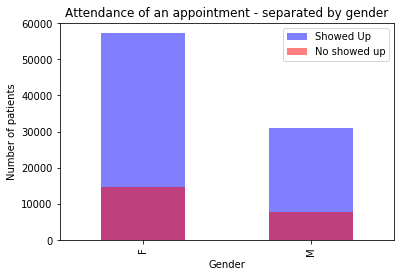

In [28]:
# plot "showed up" and "no showed up" data as bar chart, separated by gender
df.gender[df.no_show == 0].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Showed Up');
df.gender[df.no_show == 1].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No showed up');
# add legend
plt.title('Attendance of an appointment - separated by gender');
plt.xlabel("Gender")
plt.ylabel('Number of patients')
plt.legend();

#### Results
In the available data there are around twice as much female (71839) compared to the male (38687) patients. <br>
Nevertheless the ratio of the patients who showed up to an appointment does not differ so much, being 80.03% for the males and 79.69% for the females.

### Research Question 3: Influence of the age
Next, I will analyse if the age of the patient has any influence on showing up to an appointment or not. 

#### Age evaluation for patients who showed up

In [29]:
# calculate mean age of persons who attend to the appointments
df_Show.age.mean()

37.790504154999034

Text(0.5,1,'Age of patients who showed up')

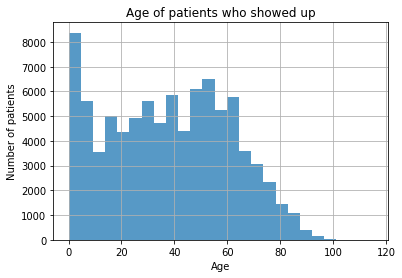

In [30]:
# create histogram plot for number of patients vs. age for patients showing up
df_Show.age.hist(alpha=0.75,bins=25,label='show')

# Plot settings
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("Age of patients who showed up")

#### Age evaluation for patients who did NOT show up

In [31]:
# calculate mean age of persons who did NOT attend to the appointments
df_noShow.age.mean()

34.317666562121957

Text(0.5,1,'Age of patients who did NOT show up')

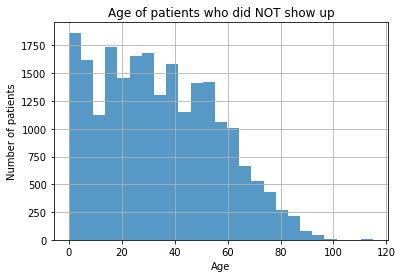

In [32]:
# create histogram plot for number of patients vs. age for patients showing up
df_noShow.age.hist(alpha=0.75,bins=25,label='no show up')

# Plot settings
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("Age of patients who did NOT show up")

#### Line Plot showing the probability of a patient for NOT showing up depending on the age

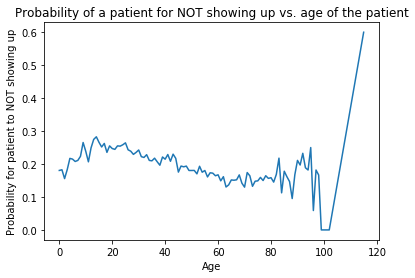

In [33]:
# group data frame by age
df_groupby_age = df.groupby(['age'])
# line plot of no_show mean = probability of patient for NOT showing up depending on the age
df_groupby_age['no_show'].mean().plot();

# plot settings
plt.xlabel("Age");
plt.ylabel("Probability for patient to NOT showing up");
plt.title("Probability of a patient for NOT showing up vs. age of the patient");

#### Histogram Plot for age comparison for patients who showed up and did NOT show up

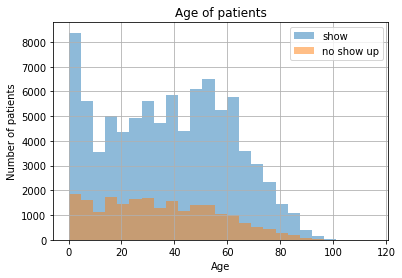

In [34]:
# create histogram plot for number of patients vs. age for patients showing up
df_Show.age.hist(alpha=0.5,bins=25,label='show')
df_noShow.age.hist(alpha=0.5,bins=25,label='no show up')

# Plot settings
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("Age of patients")
plt.legend()

#### Normalized histogram Plot for age comparison for patients who showed up and did NOT show up

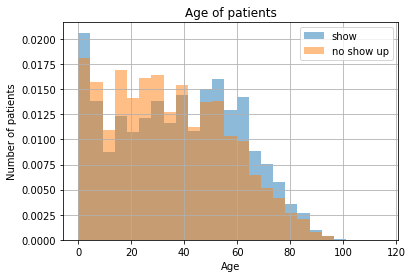

In [35]:
# create histogram plot for number of patients vs. age for patients showing up
df_Show.age.hist(density=1,alpha=0.5,bins=25,label='show')
df_noShow.age.hist(density=1,alpha=0.5,bins=25,label='no show up')

# Plot settings
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("Age of patients")
plt.legend()

#### Result
The mean age of the patients showing up is about 37 years old compared with the age of 34 years for patients who did NOT showed up. 
Looking at the age comparison histogram plot, it looks like that the younger patients between 5 years and 40 years are more often not showing up while starting with ~45 years it looks like the patients more often show up than not showing up.

### Research Question 4: Influence of a scholarship onto the attendance of an appointment
This section deals with the question if a scholarship has influence on the attendance of an appointment. Having a scholarship means that the patient is member of the social welfare program "Bolsa Familia" of the government of Brazil. 

#### Appearance of scholarships

In [36]:
# Patients with a scholarship
df_scholar = df[df.scholarship==1];

# Patients without a scholarship
df_no_scholar = df[df.scholarship==0];

# create new dataframe containing the scholarship status, the total number of patients and the ratio of these persons
df_perc_scholarship = pd.DataFrame([['with scholarship',df_scholar.shape[0],df_scholar.shape[0]/df.shape[0]],
                               ['without scholarship',df_no_scholar.shape[0],df_no_scholar.shape[0]/df.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])

#print data frame for visualization
print(df_perc_scholarship)

                status  nof_patients     ratio
0     with scholarship         10861  0.098266
1  without scholarship         99665  0.901734


#### Patients with a scholarship

In [37]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_scholar = pd.DataFrame([['showed up',df_scholar[df_scholar.no_show==0].shape[0],df_scholar[df_scholar.no_show==0].shape[0]/df_scholar.shape[0]],
                               ['Not showed up',df_scholar[df_scholar.no_show==1].shape[0],df_scholar[df_scholar.no_show==1].shape[0]/df_scholar.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_scholar)

          status  nof_patients     ratio
0      showed up          8283  0.762637
1  Not showed up          2578  0.237363


#### Patients without a scholarship

In [38]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_no_scholar = pd.DataFrame([['showed up',df_no_scholar[df_no_scholar.no_show==0].shape[0],df_no_scholar[df_no_scholar.no_show==0].shape[0]/df_no_scholar.shape[0]],
                               ['Not showed up',df_no_scholar[df_no_scholar.no_show==1].shape[0],df_no_scholar[df_no_scholar.no_show==1].shape[0]/df_no_scholar.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_no_scholar)

          status  nof_patients     ratio
0      showed up         79924  0.801926
1  Not showed up         19741  0.198074


#### Plot attendance depending on a scholarship

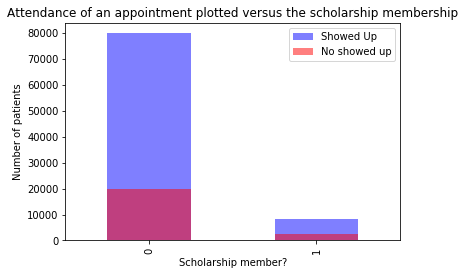

In [39]:
# create a bar plot to show the overall dependency
df.scholarship[df.no_show == 0].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Showed Up');
df.scholarship[df.no_show == 1].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No showed up');
# add plot information
plt.title('Attendance of an appointment plotted versus the scholarship membership');
plt.xlabel("Scholarship member?")
plt.ylabel('Number of patients')
plt.legend();

#### Results
90.18% of the patients (99665) have no scholarship. This leaves 10861 or 9.82% of the patients with a scholarship. 
From the persons having a scholarship, 8283 or 76.26% of the persons showed up at their appointment compared to a showing up rate of 80.20% showing up rate if the persons do not have a scholarship. 

### Research Question 5: Useful to receive a SMS
In this section I try to figure out if it is useful to receive a SMS remembering the appointment. <br>
Within this dataset it is not clear when exactly is the reminder SMS send.

#### How many patients received a SMS

In [40]:
# Patients receiving a SMS
df_sms = df[df.sms_received==1];

# Patients who did not received a SMS
df_no_sms = df[df.sms_received==0];

# create new dataframe containing the "SMS received" status, the total number of patients and the ratio of these persons
df_perc_sms = pd.DataFrame([['received SMS',df_sms.shape[0],df_sms.shape[0]/df.shape[0]],
                               ['no SMS',df_no_sms.shape[0],df_no_sms.shape[0]/df.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])

#print data frame for visualization
print(df_perc_sms)

         status  nof_patients     ratio
0  received SMS         35482  0.321029
1        no SMS         75044  0.678971


#### Patients received a SMS

In [41]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_sms_rec = pd.DataFrame([['showed up',df_sms[df_sms.no_show==0].shape[0],df_sms[df_sms.no_show==0].shape[0]/df_sms.shape[0]],
                               ['Not showed up',df_sms[df_sms.no_show==1].shape[0],df_sms[df_sms.no_show==1].shape[0]/df_sms.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_sms_rec)

          status  nof_patients     ratio
0      showed up         25698  0.724255
1  Not showed up          9784  0.275745


#### Patients received no SMS

In [42]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_no_sms = pd.DataFrame([['showed up',df_no_sms[df_no_sms.no_show==0].shape[0],df_no_sms[df_no_sms.no_show==0].shape[0]/df_no_sms.shape[0]],
                               ['Not showed up',df_no_sms[df_no_sms.no_show==1].shape[0],df_no_sms[df_no_sms.no_show==1].shape[0]/df_no_sms.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_no_sms)

          status  nof_patients     ratio
0      showed up         62509  0.832965
1  Not showed up         12535  0.167035


#### Bar plot showing the dependency of receiving a SMS to the attendance of an appointment

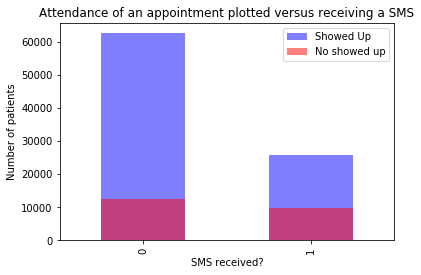

In [43]:
# create a bar plot to show the overall dependency
df.sms_received[df.no_show == 0].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Showed Up');
df.sms_received[df.no_show == 1].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No showed up');
# add plot information
plt.title('Attendance of an appointment plotted versus receiving a SMS');
plt.xlabel("SMS received?")
plt.ylabel('Number of patients')
plt.legend();

#### Result
Out of the available data, 32.10% (35482) patients received a SMS, leaving 67.79% (75044) persons without a SMS. 72.43% of the persons who received a SMS showed up their appointment, compared with 83.30% showing up at an appointment without receiving a SMS, leaves to the assumption that receiving a SMS could lead to the effect that the persons do not show up at their appointment. 

### Research Question 6: Influence of receiving a SMS if a patient is member of a scholarship
In this section I rise the question if it is useful to receive a SMS remembering the appointment if a patient is also has a scholarship. <br>

#### Overview of receiving a SMS if a patient has a scholarship 

In [44]:
# Patients with a scholarship who received a SMS
df_scholar_sms = df_sms[df_sms.scholarship==1];

# Patients with a scholarship who did NOT received a SMS
df_scholar_no_sms = df_no_sms[df_no_sms.scholarship==1];

# create new dataframe containing the SMS status, the total number of patients who received a S;S and the ratio of these persons
df_perc_scholarship_sms = pd.DataFrame([['receiving SMS',df_scholar_sms.shape[0]],
                               ['no SMS',df_scholar_no_sms.shape[0]]], 
                              columns=['status', 'nof_patients_with_scholarship'])

# print data frame
print(df_perc_scholarship_sms)

          status  nof_patients_with_scholarship
0  receiving SMS                           3505
1         no SMS                           7356


#### Patients who have a scholarship and received a SMS

In [45]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_scholar_sms_rec = pd.DataFrame([['showed up',df_scholar_sms[df_scholar_sms.no_show==0].shape[0],df_scholar_sms[df_scholar_sms.no_show==0].shape[0]/df_scholar_sms.shape[0]],
                               ['Not showed up',df_scholar_sms[df_scholar_sms.no_show==1].shape[0],df_scholar_sms[df_scholar_sms.no_show==1].shape[0]/df_scholar_sms.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_scholar_sms_rec)

          status  nof_patients     ratio
0      showed up          2321  0.662197
1  Not showed up          1184  0.337803


#### Patients who have a scholarship and did NOT received a SMS

In [46]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_scholar_no_sms_rec = pd.DataFrame([['showed up',df_scholar_no_sms[df_scholar_no_sms.no_show==0].shape[0],df_scholar_no_sms[df_scholar_no_sms.no_show==0].shape[0]/df_scholar_no_sms.shape[0]],
                               ['Not showed up',df_scholar_no_sms[df_scholar_no_sms.no_show==1].shape[0],df_scholar_no_sms[df_scholar_no_sms.no_show==1].shape[0]/df_scholar_no_sms.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_scholar_no_sms_rec)

          status  nof_patients     ratio
0      showed up          5962  0.810495
1  Not showed up          1394  0.189505


#### Bar plot showing the dependency of receiving a SMS to the attendance of an appointment if a patient has a scholarship

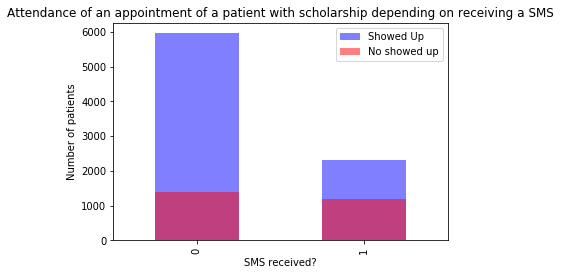

In [47]:
# create a bar plot to show the overall dependency
df_scholar.sms_received[df.no_show == 0].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Showed Up');
df_scholar.sms_received[df.no_show == 1].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No showed up');
# add plot information
plt.title('Attendance of an appointment of a patient with scholarship depending on receiving a SMS');
plt.xlabel("SMS received?")
plt.ylabel('Number of patients')
plt.legend();

#### Result
If a patient has a scholarship and received a SMS, the probability to attend at the appointment is 66.22%, if a patient with a scholarship does not receive a SMS the percentage of the attendance increased to 81.05%, so it looks like that it is contra-productive to send out SMS to patients having a scholarship.

### Research Question 7: Influence of receiving a SMS if a patient has NO scholarship
In the seventh data analysis section I try to answer the question if it is useful to receive a SMS remembering the appointment if a patient has NO scholarship. <br>

#### Overview of receiving a SMS if a patient NO scholarship 

In [48]:
# Patients without a scholarship who received a SMS
df_no_scholar_sms = df_sms[df_sms.scholarship==0];

# Patients without a scholarship who did NOT received a SMS
df_no_scholar_no_sms = df_no_sms[df_no_sms.scholarship==0];

# create new dataframe containing the SMS status, the total number of patients who received a S;S and the ratio of these persons
df_perc_no_scholarship_sms = pd.DataFrame([['receiving SMS',df_no_scholar_sms.shape[0]],
                               ['no SMS',df_no_scholar_no_sms.shape[0]]], 
                              columns=['status', 'nof_patients_without_scholarship'])

# print data frame
print(df_perc_no_scholarship_sms)

          status  nof_patients_without_scholarship
0  receiving SMS                             31977
1         no SMS                             67688


#### Patients who have NO scholarship and received a SMS

In [49]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_no_scholar_sms_rec = pd.DataFrame([['showed up',df_no_scholar_sms[df_no_scholar_sms.no_show==0].shape[0],df_no_scholar_sms[df_no_scholar_sms.no_show==0].shape[0]/df_no_scholar_sms.shape[0]],
                               ['Not showed up',df_no_scholar_sms[df_no_scholar_sms.no_show==1].shape[0],df_no_scholar_sms[df_no_scholar_sms.no_show==1].shape[0]/df_no_scholar_sms.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_no_scholar_sms_rec)

          status  nof_patients     ratio
0      showed up         23377  0.731057
1  Not showed up          8600  0.268943


#### Patients who have NO scholarship and did NOT received a SMS

In [50]:
# create new dataframe containing the "show up" status, the total number of patients and the ratio of these persons
df_perc_no_scholar_no_sms_rec = pd.DataFrame([['showed up',df_no_scholar_no_sms[df_no_scholar_no_sms.no_show==0].shape[0],df_no_scholar_no_sms[df_no_scholar_no_sms.no_show==0].shape[0]/df_no_scholar_no_sms.shape[0]],
                               ['Not showed up',df_no_scholar_no_sms[df_no_scholar_no_sms.no_show==1].shape[0],df_no_scholar_no_sms[df_no_scholar_no_sms.no_show==1].shape[0]/df_no_scholar_no_sms.shape[0]]], 
                              columns=['status', 'nof_patients', 'ratio'])
# print data frame
print(df_perc_no_scholar_no_sms_rec)

          status  nof_patients     ratio
0      showed up         56547  0.835407
1  Not showed up         11141  0.164593


#### Bar plot showing the dependency of receiving a SMS to the attendance of an appointment if a patient has NO scholarship

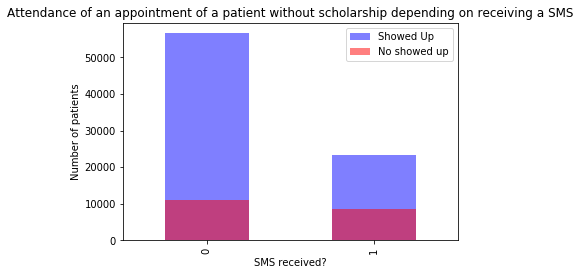

In [51]:
# create a bar plot to show the overall dependency
df_no_scholar.sms_received[df.no_show == 0].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Showed Up');
df_no_scholar.sms_received[df.no_show == 1].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No showed up');
# add plot information
plt.title('Attendance of an appointment of a patient without scholarship depending on receiving a SMS');
plt.xlabel("SMS received?")
plt.ylabel('Number of patients')
plt.legend();

#### Result
If a patient has NO scholarship and received a SMS, the probability to attend at the appointment is 73.11%, if a patient without scholarship does not receive a SMS the percentage of the attendance increased to 83.54%, so it looks like that it is also here contra-productive to send out SMS to patients having NO scholarship.

### Research Question 8: How does the day of the week relates to a No-Show Appointment?
The last question I will answer in this report deals with the question how does the day of the week influences the no-show up to an appointment.

In [52]:
# create new data frame containing the appointment day of the week (appointment_dow) and the no_show probability
df_groupby_dow = pd.DataFrame(df.groupby(['appointment_dow'])['no_show'].mean())

df_groupby_dow.head(7)

,no_show
appointment_dow,
1,0.206481
2,0.200936
3,0.196892
4,0.193541
5,0.212261
6,0.230769


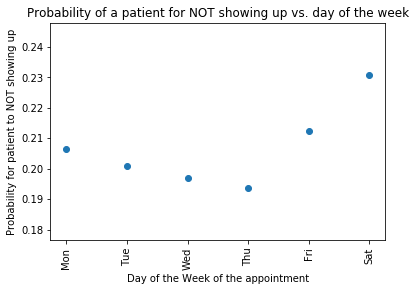

In [53]:
# Create Scatter Plot
plt.scatter(df_groupby_dow.index, df_groupby_dow.no_show)
# Plot Settings
labels_xticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'];
plt.xticks(df_groupby_dow.index, labels_xticks, rotation='vertical')
plt.xlabel("Day of the Week of the appointment")
plt.ylabel("Probability for patient to NOT showing up");
plt.title("Probability of a patient for NOT showing up vs. day of the week");
plt.show()

#### Result
The above figure shows that the probability of NOT showing up at an appointment decreases from Monday (20.65%) to Thursdays (19.35%) where it reaches the lowest point. The probability increases again from Thursdays to Fridays (21.23%) up to the highest value on Saturdays (23.08%).

<a id='conclusions'></a>
## Conclusions

* About 80% of the patients showed up to the appointment and about 1/5 (20%) did not showed up.

* In the available data there are around twice as much female (71839) compared to the male (38687) patients. Nevertheless the ratio of the patients who showed up to an appointment does not differ so much, being 80.03% for the males and 79.69% for the females.

* The mean age of the patients showing up is about 37 years old compared with the age of 34 years for patients who did NOT showed up. Looking at the age comparison histogram plot, it looks like that the younger patients between 5 years and 40 years are more often not showing up while starting with ~45 years it looks like the patients more often show up than not showing up. <br>
 * **So the age could be an indicator if a patient will show up or not.**

* 90.18% of the patients (99665) have no scholarship. This leaves 10861 or 9.82% of the patients with a scholarship. From the persons having a scholarship, 8283 or 76.26% of the persons showed up at their appointment compared to a showing up rate of 80.20% showing up rate if the persons do not have a scholarship. <br> 
 * **So there is a slightly indicator that patients having a scholarship are more often missing their appointments.**

* Sending a SMS reminder does not increase the patient´s show up
 * Not in general and it also does not matter if the patients have a scholarship or not
 
* Looking at the day of the week, **the highest probability that patients will NOT show up is found on Saturdays** (no-show up probability=23.08%), whereas the highest probability of patient to show up is given on Thursdays (no-show up probability=19.35%).  


### Limitations
- Some data were still unclear, e.g. the enormous amount of patients with an ages = 0
 - Were they all new-born children, were the age unknown?
- In other cases, some more datawould help to invesetigate the dataset a little bit more, like the question at which time did the patient received the reminder SMS? 



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

<a id='ref'></a>
## References
Date formats: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.strftime.html <br>
Information about the Bolsa Familia program: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia <br>
Normalizing a histogram: https://stackoverflow.com/questions/17874063/is-there-a-parameter-in-matplotlib-pandas-to-have-the-y-axis-of-a-histogram-as-p <br>
Markdown Notes: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet <br>
Add Column to data frame in pandas: https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/ <br>
Scatter Plot: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter#pandas.DataFrame.plot.scatter <br>
Change xticks at scatter plot: https://stackoverflow.com/questions/26358200/xticks-by-pandas-plot-rename-with-the-string <br>

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0